**Tasca M7 T01**

**Exercicis d'algoritmes de Classificació**

- Exercici 1 Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


- Exercici 2 Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.


- Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


- Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.


- Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table('wineData.txt', sep = ',')

In [3]:
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.columns = [['Class identifier', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']]
   

In [5]:
data

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
data.describe()

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- **Classification Model K-Nearest Neighbors**

- We can split our dataset into its attributes and labels:

In [8]:
y = data['Class identifier'] # Label 
X = data.drop(['Class identifier'], axis = 1) # Features 

C:\Users\flore\AppData\Local\Temp\ipykernel_3228\2905116668.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(['Class identifier'], axis = 1) # Features


- **Splitting Data into Train and Test Sets**

In [9]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(132, 13)
(132, 1)
(45, 13)
(45, 1)


- **Feature Scaling for Classification**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\flore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\flore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


- Training and Predicting for Classification
After binning, splitting, and scaling the data, we can finally fit a classifier on it. For the prediction, we will use 5 neighbors again as a baseline. You can also instantiate the KNeighbors_ class without any arguments and it will automatically use 5 neighbors. Here, instead of importing the KNeighborsRegressor, we will import the KNeighborsClassifier, class:

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [13]:
# After fitting the KNeighborsClassifier, we can predict the classes of the test data:
y_pred = classifier.predict(X_test)

In [14]:
y_pred

array([1, 1, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2,
       3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3], dtype=int64)

- Time to evaluate the predictions! Would predicting classes be a better approach than predicting values in this case? Let's evaluate the algorithm to see what happens.

**Evaluating KNN for Classification**

In [15]:
# Let's score our classifier:
acc =  classifier.score(X_test, y_test)
print('classifier score is: ', acc)

classifier score is:  0.9111111111111111


- Confusion Matrix: To know how much we got right or wrong for each class. The values that were correct and correctly predicted are called true positives the ones that were predicted as positives but weren't positives are called false positives. The same nomenclature of true negatives and false negatives is used for negative values

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.78      0.88        18
           3       0.75      1.00      0.86        12

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



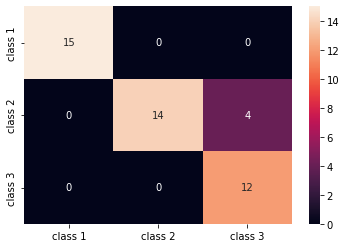

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

- We can observe that only one class has been mistaken by another: Which was Class 2, mistaken for Class 3 in 4 instances. 

- **Finding the Best K for KNN Classification**

In [39]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40): #grid search function
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Text(0, 0.5, 'F1 Score')

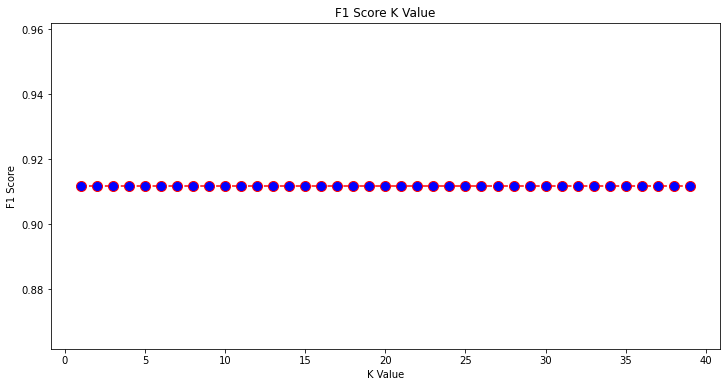

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [41]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [42]:
distances[:3], distances.shape

(array([[0.        , 1.74644969, 1.91628643, 1.92426355, 2.4851039 ],
        [0.        , 1.78948941, 1.83700603, 1.97101352, 2.14916103],
        [0.        , 3.08838244, 3.11843691, 3.26101327, 3.37376742]]),
 (132, 5))

In [43]:
indexes[:3], indexes[:3].shape

(array([[  0, 108,   4,  23,  93],
        [  1,  66,  65, 119,  27],
        [  2,  30,   9,  38,  11]], dtype=int64),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

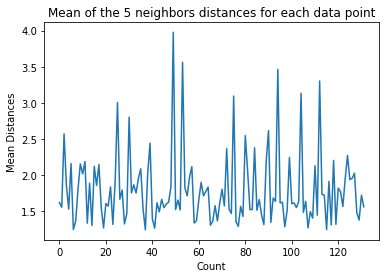

In [44]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

- Notice that there is a part of the graph in which the mean distances have uniform values. That Y-axis point in which the means aren't too high or too low is exactly the point we need to identify to cut off the outlier values.

In this case, it is where the mean distance is 2.2. Let's plot the graph again with a horizontal dotted line to be able to spot it:

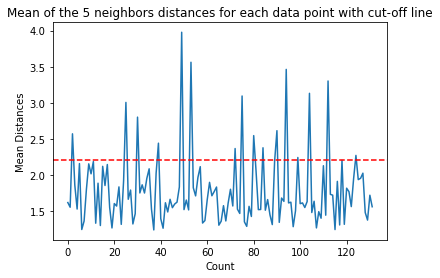

In [46]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 2.2, color = 'r', linestyle = '--')

In [45]:
import numpy as np

# Visually determine cutoff values > 2.2
outlier_index = np.where(dist_means > 2.2)
outlier_index

(array([  2,  25,  30,  39,  49,  53,  72,  75,  80,  84,  90,  94,  99,
        104, 112, 124], dtype=int64),)

In [48]:
# Filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
25,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
30,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
39,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
49,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
53,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
72,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
75,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
80,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
84,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450


- **Applying Grid Search to find the best model and the best parameters**

In [1]:
import pandas as pd
import numpy as np
data = pd.read_table('wineData.txt', sep = ',')
data.columns = [['Class identifier', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']]


In [2]:
data

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
y = data['Class identifier'] # Label 
X = data.drop(['Class identifier'], axis = 1) # Features 

C:\Users\flore\AppData\Local\Temp\ipykernel_16812\2905116668.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(['Class identifier'], axis = 1) # Features


In [4]:
print(np.shape(y))
print(np.shape(X))

(177, 1)
(177, 13)


In [5]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [6]:
#Base Model 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [7]:
# After fitting the KNeighborsClassifier, we can predict the classes of the test data:
y_pred = knn.predict(X_test)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [8]:
y_pred

array([1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 1, 2, 2, 2,
       3], dtype=int64)

In [9]:
#Summarize results 
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[12  0  3]
 [ 1 12  5]
 [ 2  3  7]]


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

- **Define Parameters**

In [32]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [33]:
grid_search.best_params_

{'n_neighbors': 19}

In [34]:
accuracy = grid_search.best_score_
print(accuracy)

0.976923076923077


In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train, y_train)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

In [36]:
y_pred = classifier.predict(X_test)

y_pred

array([1, 1, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3], dtype=int64)

In [37]:
# Let's score our classifier:
acc =  classifier.score(X_test, y_test)
print('classifier score is: ', acc)

classifier score is:  0.35555555555555557


However, the score is lower as opposee as the firt score obtain: 0.91 eventhough I have changed the parameter n_neighbors = 19 as result for grid_search.best_params_